# attempting keras + iPy

In [40]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

import numpy as np
import matplotlib.pyplot as plt

In [16]:
def plot_model(history) :
    acc      = history.history['acc']
    val_acc  = history.history['val_acc']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'bo', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [48]:
def train_model(x_train,y_train, x_val=None,y_val=None,do_val=0,hidden=[32,16],act='relu', opt='rmsprop',loss='mse',epochs=10, batch_size=512):
    model = models.Sequential()
    
    # fixed for IMDB
    input_size =10000
    output_size=1
    
    for (indx,depth) in enumerate(hidden):
        if (indx==0):
            model.add(layers.Dense(depth, activation=act, input_shape=(input_size,),kernel_regularizer=regularizers.l2(0.001)))
        else:
            model.add(layers.Dense(depth, activation=act,kernel_regularizer=regularizers.l2(0.001)))
            
    # output layer
    model.add(layers.Dense(output_size, activation='sigmoid'))
    
    arch = [input_size, hidden, output_size]

    model.compile(optimizer=opt,
                  loss=loss,
                  metrics=['accuracy'])
    
    print ("Network INFO: ")
    print ("\tLayers:",arch)
    print ("\t Hyper: act=%s opt=%s loss=%s batch_size=%d" %(act,opt,loss,batch_size));
    if (do_val):
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val,y_val))
        plot_model(history)
    else:
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

    print ("INFO: model evaluation .. ")
    results = model.evaluate(x_test, y_test)
    return results

# IMDB

In [50]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype ('float32')

# setup the validation & training data
# ensure there's no information leak!!
x_val   = x_train[:10000]
x_train = x_train[10000:]

y_val   = y_train[:10000]
y_train = y_train[10000:]

---
## re-train a new network

NO regularization
Network INFO: 
	Layers: [10000, [1024, 1024, 1024], 1]
	 Hyper: act=relu opt=rmsprop loss=mse batch_size=512
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 30s 2ms/step - loss: 0.2016 - acc: 0.6914 - val_loss: 0.1077 - val_acc: 0.8645
Epoch 2/10
15000/15000 [==============================] - 29s 2ms/step - loss: 0.0715 - acc: 0.9054 - val_loss: 0.0951 - val_acc: 0.8754
Epoch 3/10
15000/15000 [==============================] - 29s 2ms/step - loss: 0.0361 - acc: 0.9547 - val_loss: 0.0901 - val_acc: 0.8859
Epoch 4/10
15000/15000 [==============================] - 30s 2ms/step - loss: 0.0179 - acc: 0.9789 - val_loss: 0.0912 - val_acc: 0.8889
Epoch 5/10
15000/15000 [==============================] - 28s 2ms/step - loss: 0.0030 - acc: 0.9968 - val_loss: 0.0992 - val_acc: 0.8804
Epoch 6/10
15000/15000 [==============================] - 30s 2ms/step - loss: 0.0203 - acc: 0.9786 - val_loss: 0.0965 - val_acc: 0.8879
E

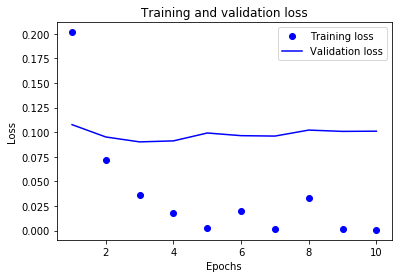

INFO: model evaluation .. 
25000/25000 [==============================] - 33s 1ms/step


[0.10650592502637767, 0.88107999999999997]

In [47]:
print ("No regularization")
results = train_model(epochs=10,hidden=[1024,1024,1024],x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,do_val=1)
results

With regularization
Network INFO: 
	Layers: [10000, [1024, 1024, 1024], 1]
	 Hyper: act=relu opt=rmsprop loss=mse batch_size=512
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 38s 3ms/step - loss: 1.3405 - acc: 0.6607 - val_loss: 0.4253 - val_acc: 0.8333
Epoch 2/10
15000/15000 [==============================] - 33s 2ms/step - loss: 0.2628 - acc: 0.8577 - val_loss: 0.2542 - val_acc: 0.7531
Epoch 3/10
15000/15000 [==============================] - 30s 2ms/step - loss: 0.1504 - acc: 0.8764 - val_loss: 0.1561 - val_acc: 0.8604
Epoch 4/10
15000/15000 [==============================] - 33s 2ms/step - loss: 0.1232 - acc: 0.9010 - val_loss: 0.1291 - val_acc: 0.8832
Epoch 5/10
15000/15000 [==============================] - 31s 2ms/step - loss: 0.1163 - acc: 0.9053 - val_loss: 0.1276 - val_acc: 0.8813
Epoch 6/10
15000/15000 [==============================] - 30s 2ms/step - loss: 0.1092 - acc: 0.9119 - val_loss: 0.1266 - val_acc: 0.8800

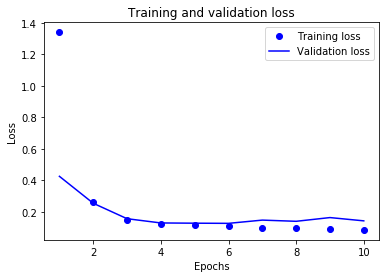

INFO: model evaluation .. 
25000/25000 [==============================] - 57s 2ms/step


[0.14686048585414888, 0.85199999999999998]

In [51]:
print ("With regularization")
results = train_model(epochs=10,hidden=[1024,1024,1024],x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,do_val=1)
results

---

# Misc checks

## normalization

In [11]:
import numpy as np

# raw data
x = np.random.randn(10000,1)
mean_raw  = np.mean(x)
stdev_raw = np.std(x)
print ("raw mean =", mean_raw)
print ("raw stdev=",stdev_raw)

# normalize data
y = (x-mean_raw)/stdev_raw
mean_norm  = np.mean(y)
stdev_norm = np.std(y)
"""
easier way to do the above:
x -= x.mean(axis=0)
x /= x.std (axis=0)
"""

print ("nrm  mean=",mean_norm)
print ("nrm stdev=",stdev_norm)

# ensure normalized data has right distribution .. using the 'isclose' function
assert(np.isclose(mean_norm,  0.,atol=1e-16))
assert(np.isclose(stdev_norm, 1.,atol=1e-16))


raw mean = -0.00834795297806
raw stdev= 0.99633309672
nrm  mean= 1.84741111298e-17
nrm stdev= 1.0
